In [1]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column, row, layout
from bokeh.models import ColumnDataSource, HoverTool, Select, DateRangeSlider
from bokeh.palettes import Spectral10, Category10
from bokeh.transform import factor_cmap, cumsum
from scipy import stats
import math
from bokeh.palettes import Category10, Category20
import itertools
import seaborn as sns   # Data visualization (plots)
import plotly.express as px

file_clean_data = pd.read_csv("Data/cleaned_healthcare_dataset.csv")
df = pd.DataFrame(file_clean_data)
df

,First_name,Last_name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Jon,Proctor,58,Female,A-,Diabetes,2023-02-18,James Nelson,Griffin-Foster,Cigna,19092.692951,491,Elective,2023-03-14,Aspirin,Inconclusive
1,Michelle,Roberts,28,Female,B-,Asthma,2020-09-04,Lisa Hess,"Walker Blake, And Hughes",Medicare,11346.545701,216,Urgent,2020-09-27,Paracetamol,Inconclusive
2,Robert,Daniels Jr.,78,Male,A+,Arthritis,2022-11-22,Nicholas Graves,Robles-Fisher,Aetna,37084.986334,257,Emergency,2022-12-15,Penicillin,Normal
3,Glenn,Estrada,33,Female,B-,Arthritis,2021-05-25,Matthew Goodman,Nixon Sons And,Medicare,45310.630922,388,Emergency,2021-06-17,Ibuprofen,Normal
4,Brenda,Davis,42,Female,B-,Cancer,2021-03-16,Eric Hudson,Curtis Plc,Cigna,36569.665156,268,Emergency,2021-04-09,Lipitor,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,Angela,Wagner,32,Female,A-,Asthma,2020-01-17,John White,"And Lutz, Smith White",Aetna,18468.904310,163,Elective,2020-01-23,Ibuprofen,Normal
982,Misty,Bailey,64,Female,B+,Asthma,2019-06-14,Paul Thomas,And Sons Mills,Blue Cross,26046.560731,284,Urgent,2019-07-06,Ibuprofen,Abnormal
983,Joseph,Stevens,75,Female,O+,Obesity,2023-01-30,John Watson,Schneider And Sons,Cigna,-967.594706,476,Elective,2023-02-13,Ibuprofen,Normal
984,Jessica,Baird,56,Male,AB-,Asthma,2021-08-17,Alexander Higgins,Hurley Inc,Aetna,8656.079769,279,Elective,2021-08-23,Ibuprofen,Inconclusive


In [2]:
df.columns

Index(['First_name', 'Last_name', 'Age', 'Gender', 'Blood Type',
       'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')

              Age              Date of Admission  Billing Amount  Room Number  \
count  986.000000                            986      986.000000   986.000000   
mean    52.893509  2021-10-21 20:06:19.716024320    25834.203235   304.133874   
min     13.000000            2019-05-09 00:00:00     -967.594706   101.000000   
25%     36.000000            2020-07-20 00:00:00    13848.742661   210.000000   
50%     54.000000            2021-10-02 00:00:00    25842.810535   307.500000   
75%     70.000000            2023-01-04 00:00:00    37660.059876   406.000000   
max     88.000000            2024-05-07 00:00:00    50576.942752   500.000000   
std     19.410705                            NaN    14193.771708   115.905118   

                      Discharge Date  
count                            986  
mean   2021-11-06 21:14:58.174442240  
min              2019-05-13 00:00:00  
25%              2020-08-10 06:00:00  
50%              2021-10-14 12:00:00  
75%              2023-01-21 12:00:00

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



Correlation between Age and Billing Amount: 0.04
T-test for Billing Amount difference between genders: t-statistic = 0.79, p-value = 0.4301
ANOVA for Billing Amount differences among Medical Conditions: F-statistic = 1.74, p-value = 0.1227


Launching server at http://localhost:58741


AssertionError: 

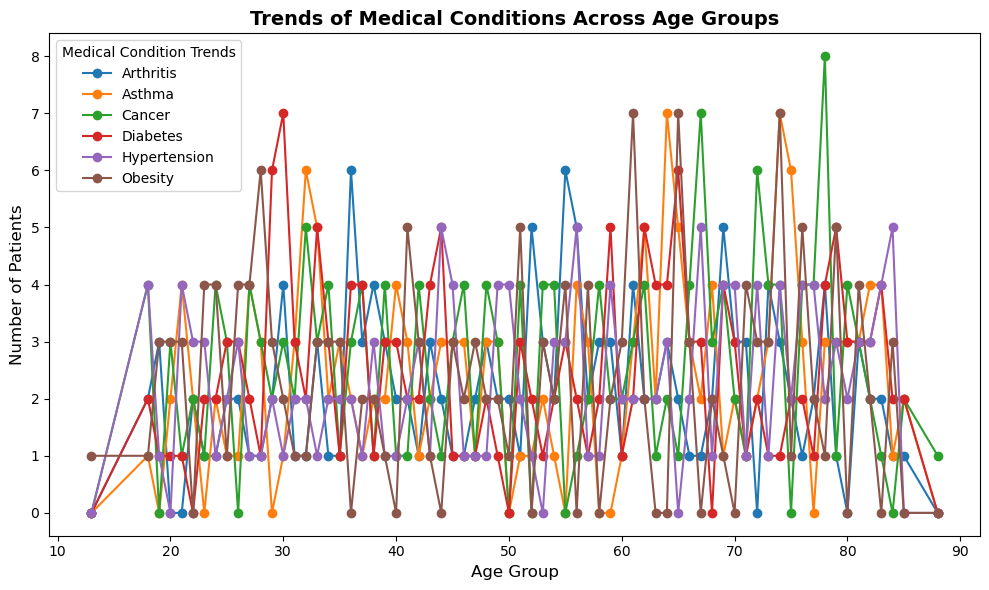

In [6]:

df['Age'] = df['Age'].astype(int)
df['Billing Amount'] = df['Billing Amount'].astype(float)
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Display basic statistics
print(df.describe())

# Create ColumnDataSource
source = ColumnDataSource(df)

# 1. Age Distribution Histogram
p1 = figure(title="Age Distribution", x_axis_label="Age", y_axis_label="Count", 
            width=400, height=300, toolbar_location=None)
hist, edges = np.histogram(df['Age'], bins=10)
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.7)
p1.add_tools(HoverTool(tooltips=[("Age", "@left"), ("Count", "@top")]))

# 2. Medical Condition Bar Chart
condition_counts = df['Medical Condition'].value_counts()
p2 = figure(title="Medical Conditions", x_range=condition_counts.index.tolist(), 
            width=400, height=300, toolbar_location=None)
p2.vbar(x='Medical Condition', top='count', width=0.9, source=ColumnDataSource(condition_counts.reset_index()),
        line_color='white', fill_color=factor_cmap('Medical Condition', palette=Spectral10, factors=condition_counts.index.tolist()))
p2.xgrid.grid_line_color = None
p2.y_range.start = 0
p2.xaxis.axis_label = "Medical Condition"
p2.yaxis.axis_label = "Count"
p2.xaxis.major_label_orientation = 0.7
p2.add_tools(HoverTool(tooltips=[("Condition", "@Medical_Condition"), ("Count", "@count")]))

# 3. Billing Amount vs Age Scatter Plot
p3 = figure(title="Billing Amount vs Age", x_axis_label="Age", y_axis_label="Billing Amount", 
            width=400, height=300, toolbar_location=None)
p3.circle('Age', 'Billing Amount', size=10, color="navy", alpha=0.5, source=source)
p3.add_tools(HoverTool(tooltips=[("Name", "@First_name @Last_name"), ("Age", "@Age"), ("Billing Amount", "@{Billing Amount}{0,0.00}")]))

# 4. Gender Distribution Pie Chart
gender_counts = df['Gender'].value_counts()
num_genders = len(gender_counts)

# Create a color iterator that cycles through colors if we have more categories than colors
color_iterator = itertools.cycle(Category20[20])  # Use Category20 for more color options

gender_source = ColumnDataSource(dict(
    gender=gender_counts.index,
    count=gender_counts.values,
    angle=gender_counts.values / gender_counts.sum() * 2*math.pi,
    color=[next(color_iterator) for _ in range(num_genders)]  # Assign colors dynamically
))

p4 = figure(title="Gender Distribution", toolbar_location=None, tools="hover", tooltips="@gender: @count", x_range=(-0.5, 1.0))
p4.wedge(x=0, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
         line_color="white", fill_color='color', legend_field='gender', source=gender_source)
p4.axis.axis_label = None
p4.axis.visible = False
p4.grid.grid_line_color = None

# Adjust legend if there are many categories
if num_genders > 10:
    p4.legend.orientation = "horizontal"
    p4.legend.location = "bottom_center"
else:
    p4.legend.location = "right"
# 5. Time Series Plot of Admissions
df_sorted = df.sort_values('Date of Admission')
df_sorted['Cumulative Admissions'] = range(1, len(df_sorted) + 1)
p5 = figure(title="Cumulative Admissions Over Time", x_axis_label="Date", y_axis_label="Cumulative Admissions", 
            width=800, height=300, x_axis_type="datetime", toolbar_location=None)
p5.line(x='Date of Admission', y='Cumulative Admissions', line_width=2, color="navy", source=ColumnDataSource(df_sorted))
p5.add_tools(HoverTool(tooltips=[("Date", "@Date_of_Admission{%F}"), ("Admissions", "@Cumulative_Admissions")], formatters={"@Date_of_Admission": "datetime"}))

# Interactive Widgets
condition_select = Select(title="Select Medical Condition", value="All", options=["All"] + df['Medical Condition'].unique().tolist())
date_range_slider = DateRangeSlider(title="Date Range", start=df['Date of Admission'].min(), end=df['Date of Admission'].max(), value=(df['Date of Admission'].min(), df['Date of Admission'].max()), step=1)

# Callback function for interactive filtering
def update_plots(attr, old, new):
    selected_condition = condition_select.value
    start_date, end_date = date_range_slider.value
    
    filtered_df = df[
        (df['Date of Admission'] >= pd.Timestamp(start_date)) &
        (df['Date of Admission'] <= pd.Timestamp(end_date))
    ]
    
    if selected_condition != "All":
        filtered_df = filtered_df[filtered_df['Medical Condition'] == selected_condition]
    
    new_source = ColumnDataSource(filtered_df)
    source.data.update(new_source.data)
    
    # Update other plots as needed
    # For example, updating the age distribution plot:
    hist, edges = np.histogram(filtered_df['Age'], bins=10)
    p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.7)

condition_select.on_change('value', update_plots)
date_range_slider.on_change('value', update_plots)

# Advanced Statistical Analysis
def perform_statistical_analysis(df):
    # Correlation between Age and Billing Amount
    correlation = df['Age'].corr(df['Billing Amount'])
    
    # T-test: Billing Amount difference between genders
    female_billing = df[df['Gender'] == 'Female']['Billing Amount']
    male_billing = df[df['Gender'] == 'Male']['Billing Amount']
    t_stat, p_value = stats.ttest_ind(female_billing, male_billing)
    
    # ANOVA: Billing Amount differences among Medical Conditions
    conditions = df['Medical Condition'].unique()
    condition_groups = [df[df['Medical Condition'] == condition]['Billing Amount'] for condition in conditions]
    f_stat, p_value_anova = stats.f_oneway(*condition_groups)
    
    return f"Correlation between Age and Billing Amount: {correlation:.2f}\n" \
           f"T-test for Billing Amount difference between genders: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}\n" \
           f"ANOVA for Billing Amount differences among Medical Conditions: F-statistic = {f_stat:.2f}, p-value = {p_value_anova:.4f}"

stats_results = perform_statistical_analysis(df)
print(stats_results)

# Layout
layout = column(
    row(condition_select, date_range_slider),
    row(p1, p2, p3),
    row(p4, p5),
    sizing_mode="stretch_both"
)

show(layout)



Launching server at http://localhost:58801


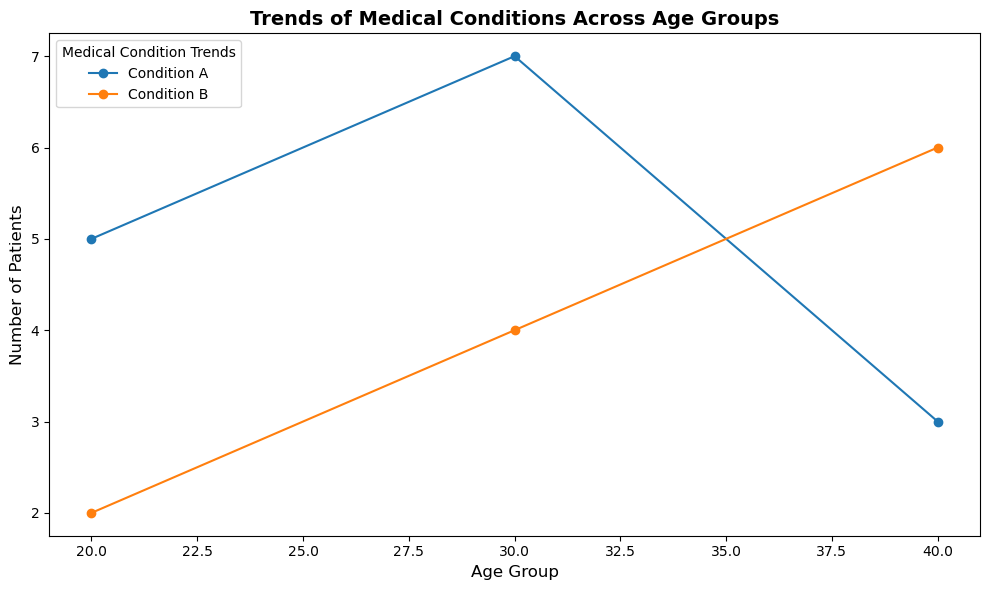

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

pn.extension()

# Assuming df is your pandas DataFrame with proper data
# Define age_condition_distribution for example purposes
data = {'Age': [20, 30, 40], 'Condition A': [5, 7, 3], 'Condition B': [2, 4, 6]}
age_condition_distribution = pd.DataFrame(data).set_index('Age')

# Prepare your Matplotlib plot
fig, ax = plt.subplots(figsize=(10, 6))
age_condition_distribution.plot(kind='line', marker='o', ax=ax)
ax.legend(title='Medical Condition Trends', loc='upper left')
ax.set_title('Trends of Medical Conditions Across Age Groups', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Number of Patients', fontsize=12)
plt.tight_layout()

# Use Panel to display the matplotlib plot
mpl_pane = pn.pane.Matplotlib(fig)

# Create a sample Bokeh plot for demonstration
bokeh_data = {'x': [1, 2, 3, 4], 'y': [4, 3, 2, 1]}
source = ColumnDataSource(bokeh_data)
bokeh_plot = figure(title="Sample Bokeh Plot")
bokeh_plot.line('x', 'y', source=source)

# Combine the Matplotlib and Bokeh plots into a Panel layout
layout = pn.Column(mpl_pane, bokeh_plot)  # You can add more Bokeh plots similarly

# Serve or display
layout.show()  # For a script, use layout.servable() if serving with a panel server